### Drought monthly bulletin products

current data base: https://iridl.ldeo.columbia.edu

The drought bulletin are produced on a monthly basis by ACMAD and distributed to the african national Meteorological Services.
It is focussing on climate indices related to drought

Currently the bulletin is covering: 
 * PRECIPITATION  IN PERCENT  OF AVERAGE
 * STANDARDIZED PRECIPITATION INDEX (SPI)
 * SOIL MOISTURE ANOMALY
 * NORMALIZED DIFFERENCE VEGETATION INDEX (NDVI)
 * Drought signal based on precipitation:
 
      **Severe drought** :            RR < [50]%  or  RR [50;  75]% ;  SPI[-3;-2] or SPI<[-3], SM<[-60] & NDVI<[-0.20] 
      
      **Moderate intensity drought**  RR [50; 75]% ; SPI[-2;-1]; SM [-60; -10]mm & NDVI [-0.20; -0.1]
      
      **Low intensity drought**       RR [75; 100]% ; SPI[-1; -0.5]; SM [-30;  -10]mm &  NDVI [-0.1;  0.05]
      
      **No drought signal**

In [6]:
################################################
#  connection to WPS server
#  Climate indices can be performed with finch
################################################

from birdy import WPSClient
# finch = WPSClient('https://pavics.ouranos.ca/twitcher/ows/proxy/finch/', progress=True)
finch = WPSClient('http://localhost:8092', progress=True)

In [7]:
# fp = WPSClient('https://pavics.ouranos.ca/twitcher/ows/proxy/flyingpigeon/', progress=True)
fp = WPSClient('http://localhost:8093', progress=True)

## Start data production for the bulletin

Steps to perform:

* Fetch data 

* subset the region of interest

* Draught indices calculation

* Visualisation


In [8]:
############################
## Data netCDF files sources 

# http://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCEP/.CPC/.CAMS_OPI/.v0208/.mean/.prcp/data.nc
# Jan 1979 to present
noaa = 'https://psl.noaa.gov/thredds/fileServer/Datasets/cmap/enh/precip.mon.mean.nc'

# example data set: (hourly!)
era5 = 'https://pavics.ouranos.ca/twitcher/ows/proxy/thredds/fileServer/birdhouse/ecmwf/era5/pr_era5_reanalysis_hourly_2018.nc'


In [9]:
# Subset Africa polygon:
precip = fp.subset_continents(resource=noaa, region='Africa')

In [14]:
precip.get()

subset_continentsResponse(
    output='http://localhost:8093/outputs/653e0ff4-93a1-11ea-92a9-9cb6d08a53e7/precip.mon.mean_Africa.nc',
    metalink='http://localhost:8093/outputs/653e0ff4-93a1-11ea-92a9-9cb6d08a53e7/input.meta4'
)

In [25]:
### Plot the precip of target Month 

plot = fp.plot_map_timemean(resource=precip.get()[0],
                            variable=None,
                            title='Current Month',
                            datestart='2020-03-01',
                            dateend='2020-03-31',
                            cmap='Blues',
                            delta=0.0,
                            vmin=0,
                            vmax=50,
                            )

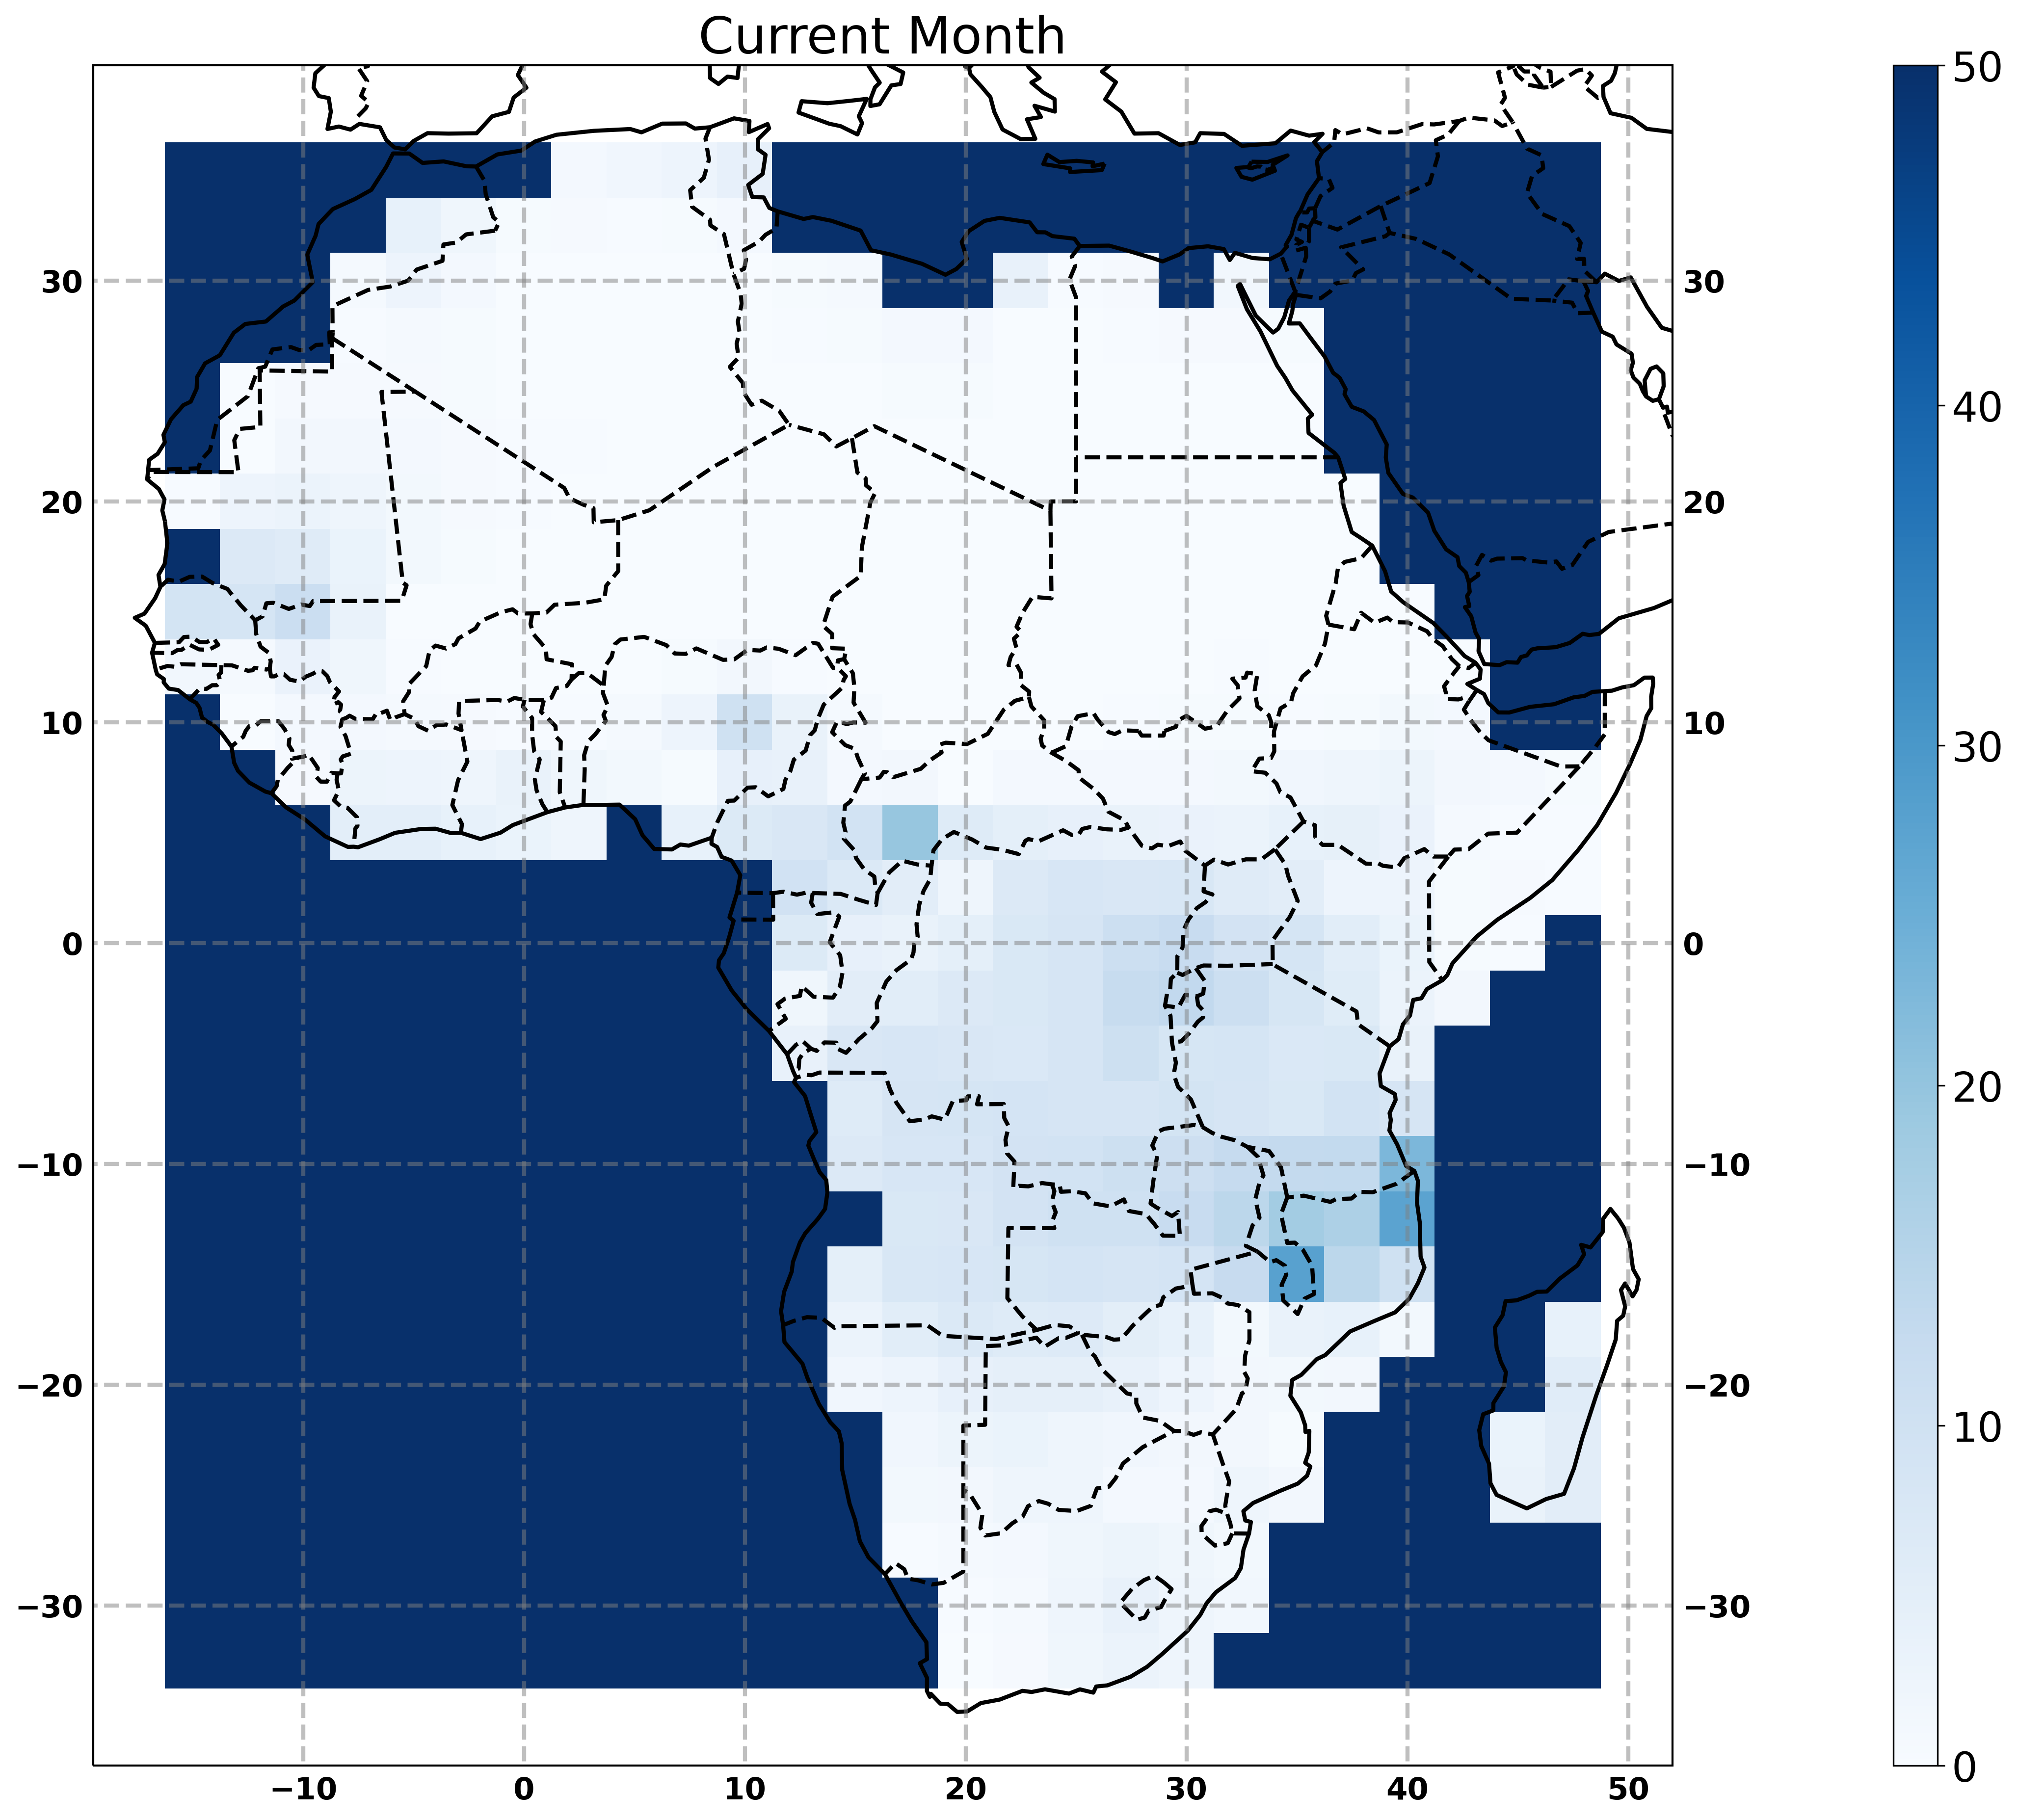

In [26]:
# To display Images from an url
from IPython.core.display import HTML 
from IPython.display import Image

Image(plot.get()[0], width=600)

In [1]:
##############################################
## ECMWF ERA5 data would be good as input?:
# https://confluence.ecmwf.int/display/WEBAPI/Python+ERA-interim+examples
# https://cds.climate.copernicus.eu/cdsapp#!/dataset/reanalysis-era5-land?tab=form

import cdsapi

c = cdsapi.Client()
# NOTE: cdsapi requires userid and key from https://cds.climate.copernicus.eu/api/v2


c.retrieve(
    'reanalysis-era5-land',
    {
        'format': 'netcdf',
        'variable': 'total_precipitation',
        'year': '2020',
        'month': '01',
        'day': [
            '01', '02', '03',
            '04', '05', '06',
            '07', '08', '09',
            '10', '11', '12',
            '13', '14', '15',
            '16', '17', '18',
            '19', '20', '21',
            '22', '23', '24',
            '25', '26', '27',
            '28', '29', '30',
            '31',
        ],
        'time': [
            '00:00', '01:00', '02:00',
            '03:00', '04:00', '05:00',
            '06:00', '07:00', '08:00',
            '09:00', '10:00', '11:00',
            '12:00', '13:00', '14:00',
            '15:00', '16:00', '17:00',
            '18:00', '19:00', '20:00',
            '21:00', '22:00', '23:00',
        ],
        'area': [
            20, -20, 0,
            30,
        ],
    },
    'download.nc')


2020-05-07 08:19:55,448 INFO Welcome to the CDS
2020-05-07 08:19:55,452 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-land


Exception: <html>
<head><title>401 Authorization Required</title></head>
<body>
<center><h1>401 Authorization Required</h1></center>
<hr><center>nginx/1.16.1</center>
</body>
</html>


In [2]:
# manual download 
file = '/home/nils/data/adaptor.mars.internal-1588835626.3076494-20193-28-3cfa8a5b-b454-4621-9f0b-7152dfc39b4d.nc'

In [7]:
# subset for parts of Africa

pr_subset= finch.subset_bbox( resource=urls, lon0=-80.0, lon1=-60.0, lat0=50.0, lat1=60.0) # coordinates needs to be adapted

In [7]:
# perfrom drought indices calculation

dry_days = finch.dry_days(pr=file)

2020-05-07 09:30:18,713 INFO Executing WPS request...


ConnectionError: ('Connection aborted.', BrokenPipeError(32, 'Broken pipe'))